<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/AI%EC%8B%A4%EC%8A%B5/day14(tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

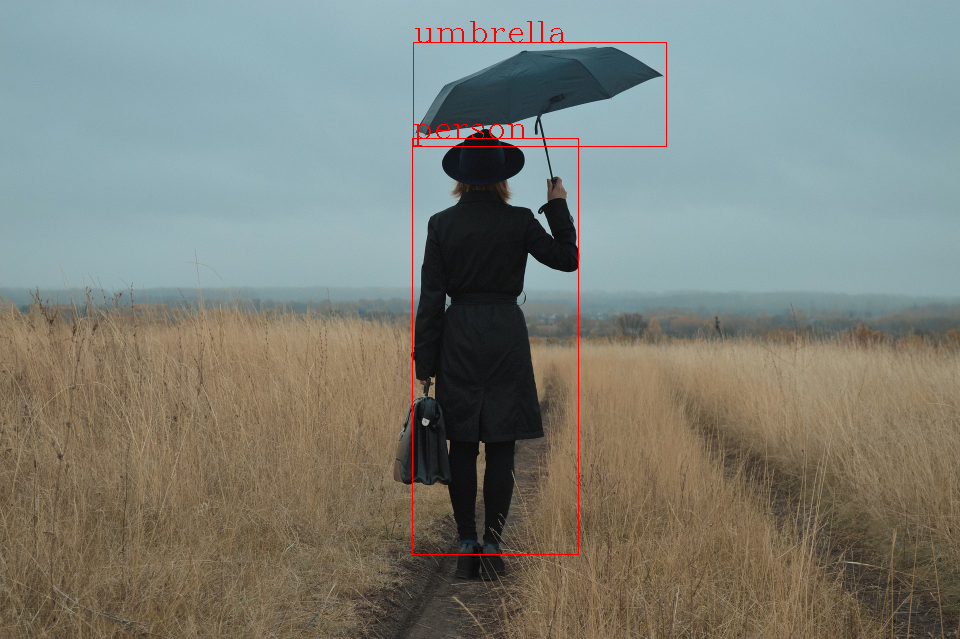

In [2]:
import cv2
from google.colab.patches import cv2_imshow

config = "sample_data/tensorflow_model/graph.pbtxt"
model = "sample_data/tensorflow_model/frozen_inference_graph.pb"
with open("sample_data/tensorflow_model/labelmap.txt") as file:
    classNames = file.read().splitlines()

image = cv2.imread("sample_data/umbrella.jpg", cv2.IMREAD_REDUCED_COLOR_2)
net = cv2.dnn.readNetFromTensorflow(model, config)
inputBlob = cv2.dnn.blobFromImage(image, 1, (300, 300), swapRB=True, crop=False)

net.setInput(inputBlob)
outputBlobs = net.forward()

for prob in outputBlobs[0, 0, :, :]:
    confidence = prob[2]
    if confidence > 0.9:
        classes = int(prob[1])
        label = classNames[classes]

        x1 = int(prob[3] * image.shape[1])
        y1 = int(prob[4] * image.shape[0])
        x2 = int(prob[5] * image.shape[1])
        y2 = int(prob[6] * image.shape[0])

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255))
        cv2.putText(image, label, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0, 0, 255))

cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()